# テーマ1_AIで読み解く未来の購買行動 - 小売業の需要予測体験　サンプルコード

本ノートブックは、**テーマ1**において配布されたデータを分析し、投稿ファイルを作成するまでの大まかな流れを、ソースコードや実行結果とともに示したものとなっています。本ノートブックは、ご自身の予測モデルを構築するための出発点としてご活用いただけます。<br>

なお、本ノートブックでは、プログラミング言語Pythonを使用します。<br>
これまでにPythonを使ったことが無いといった方々に関しては、事前に下記の講座を受講していただくことをおすすめします。<br>

- [SIGNATE Cloud講座「Python入門」](https://biz.quest.signate.jp/quests/10003)
- [SIGNATE Cloud講座「pandas道場（入門編）」](https://biz.quest.signate.jp/quests/10007)
<br>(※ 受講生の皆様は、マナビDXQuestの期間中、SIGNATE Cloudを無料で受講することができます。)

本ノートブックは、以下の流れで構成されています。

* [第0章：はじめに - データ分析と予測モデル構築への第一歩](#0)
* [第1章：分析環境の準備](#1)
* [第2章：データの理解と確認](#2)
* [第3章：データの前処理](#3)
* [第4章：予測モデルの構築と学習](#4)
* [第5章：予測結果の出力](#5)
* [第6章：さらなる精度向上に向けて](#6)

本ノートブックで使用するデータは以下です。

- sales_history.csv
- item_categories.csv
- category_names.csv
- test.csv
- sample_submission.csv

サイトからダウンロードして当ノートブックと同じディレクトリに配置してください。なお、以下のようなフォルダ構成を前提としています。

```
MDXQ（Colabの場合は"マイドライブ"の直下に"MDXQ"フォルダがある想定）
└─ theme1_sample_code.ipynb（本notebook）
└─ sales_history.csv
└─ item_categories.csv
└─ category_names.csv
└─ test.csv
└─ sample_submission.csv
```

<a name="0"></a>
# 第0章：はじめに - データ分析と予測モデル構築への第一歩

## 0-1. このNotebookで取り組む課題：需要予測

このNotebookへようこそ。ここでは、データ分析の一分野である「需要予測」に取り組みます。

* **「需要予測」とは？**
    * 将来、特定の商品やサービスがどれだけ求められるか（需要があるか）を、過去の実績や様々な関連情報に基づいて予測する技術のことです。
    * 例えば、小売業界では「来月、この新商品はいくつ売れるだろうか」、製造業では「次の四半期に、主力製品の部品はどれだけ必要になるか」といった予測が日々行われています。

* **なぜ需要予測が重要なのでしょうか？**
    * 適切な需要予測は、過剰在庫による廃棄ロスの削減や、品切れによる販売機会の損失を防ぐために不可欠です。
    * また、効率的な生産計画、人員配置、マーケティング戦略の立案など、企業活動の様々な側面で的確な意思決定を支援します。
    * このように、需要予測はビジネスの効率化と収益性向上に大きく貢献する重要な取り組みです。

* **このNotebookにおける目標**
    * **提供された過去の販売実績データを用いて、特定期間における特定店舗・特定商品の販売数を予測するAIモデルを構築することを目指します。**


### 0-2. データ分析・AIモデル構築の一般的な進め方

AIモデル、特に予測モデルを構築する際には、一般的に以下のようなステップでプロジェクトが進められます。これは「CRISP-DM」といった代表的なプロセスモデルの考え方にも通じるものです。

1.  **【ステップ1】課題の明確化（ビジネス理解）**
    * まず、AIを用いて何を達成したいのか、どのようなビジネス課題を解決したいのかを明確に定義します。
    * 具体的な目標値を設定したり、成功の基準を定めたりすることも重要です。

2.  **【ステップ2】データの収集と理解**
    * 課題解決に必要なデータを特定し、収集します。
    * 収集したデータの内容（各項目が何を表すか、データの量や期間、欠損値の有無など）を詳細に確認し、データの特性を把握します。

3.  **【ステップ3】データの探索的分析（EDA）**
    * データをグラフ化したり、基本的な統計量を算出したりしながら、データに潜むパターン、傾向、外れ値、変数間の関連性などを多角的に探索します。
    * この分析を通じて、モデル構築に役立つ知見や、データ前処理の方針を得ます。

4.  **【ステップ4】データの前処理**
    * 収集・分析した生のデータを、AIモデルが学習しやすい形式に加工・変換します。
    * 具体的には、欠損値の補完、外れ値の処理、カテゴリデータの数値化、正規化、新しい特徴量の作成（特徴量エンジニアリング）などが含まれます。

5.  **【ステップ5】モデルの選定と構築**
    * 解決したい課題の種類（予測、分類など）やデータの特性に応じて、適切なAIモデル（アルゴリズム）を選定します。
    * 選定したモデルを用いて、具体的な予測の仕組みを設計・構築します。

6.  **【ステップ6】モデルの学習**
    * 前処理済みの学習用データを用いて、モデルにデータ内のパターンを学習させます。
    * モデルは、入力データと正解（目的変数）の関係性を学び、予測能力を獲得していきます。

7.  **【ステップ7】モデルの評価**
    * 学習済みモデルが、未知のデータに対してどの程度の予測精度を持つかを評価します。
    * 評価指標（例：平均二乗誤差、正解率など）を用い、モデルの性能を客観的に判断します。
    * 結果が目標に達しない場合は、前処理やモデル選定、学習方法などを見直し、改善を図ります。

8.  **【ステップ8】モデルの展開（デプロイ）と運用・改善**
    * 性能が確認されたモデルを実際の業務システムに組み込み、運用を開始します（デプロイ）。
    * 運用後も、モデルの予測精度を継続的に監視し、新しいデータで再学習を行ったり、モデル自体を改良したりすることで、長期的に高い性能を維持・向上させていきます。

これらのステップは必ずしも一方向に進むわけではなく、必要に応じて前のステップに戻りながら、反復的に進められることが一般的です。このNotebookでも、これらのステップの一部を体験していただきます。

## 0-3. このNotebookで使用するツールと学習にあたって

この分析では、主に以下のツールを使用します。

* **Python (パイソン)言語**
    * シンプルで読みやすい構文を持ちながら、データ分析、機械学習、ウェブ開発など幅広い用途で活用されている強力なプログラミング言語です。
    * 豊富なライブラリ（便利な機能群）が提供されており、効率的な開発が可能です。

* **Jupyter Notebook (ジュピターノートブック)**
    * 現在ご覧いただいているこの環境がJupyter Notebookです。
    * プログラムコードとその実行結果、解説文、グラフなどを一つの文書としてまとめて管理・共有できるため、データ分析のプロセスを記録し、試行錯誤するのに非常に適しています。

* **プログラミングやデータ分析が初めての方へ**
    * 専門用語や新しい概念が出てくるかもしれませんが、一つ一つ丁寧に進めていきますのでご安心ください。
    * まずはコードを実行し、何が起こるかを観察することから始めてみましょう。
    * Pythonの基礎から体系的に学習したい場合は、以下の無料講座もご活用いただけます。
        * [SIGNATE Cloud講座「Python入門」](https://biz.quest.signate.jp/quests/10003)
        * (※ 受講生の皆様は、マナビDXQuestの期間中、SIGNATE Cloudを無料で受講することができます。)

## 0-4. このNotebookにおける分析の具体的なステップ

0-2.で示したデータ分析・AIモデル構築の一般的な進め方のうち、「ステップ1：課題の明確化（ビジネス理解）」については、今回の場合、既にこれまでの演習を通じてお客様のビジネスについて理解したり、目標を設定したりしてきました。
このNotebookでは、「ステップ2：データの収集と理解」以降を、以下のステップに沿って分析を進めていきます。

1.  **第1章：分析環境の準備**
    * 分析に必要な環境設定、ライブラリの導入、データファイルの配置など、分析の基盤を整えます。
2.  **第2章：データの理解と確認**
    * 分析対象となるデータをプログラムに読み込み、その構造や基本的な統計情報、データの特性を把握します。
3.  **第3章：データの前処理**
    * AIモデルが効果的に学習できるよう、収集したデータを加工・整形します。具体的には、データの集計、異なる情報源からのデータの結合、データ型の変換などを行います。
4.  **第4章：予測モデルの構築と学習**
    * 機械学習アルゴリズム（本Notebookでは線形回帰モデル）を利用して、過去のデータに基づき未来の販売数を予測するモデルを構築し、学習データを用いてモデルの訓練を行います。
5.  **第5章：予測結果の出力**
    * 学習済みモデルを用いて予測を行い、その結果を指定された形式でファイルに出力します。
6.  **第6章：さらなる精度向上に向けて**
    * 構築したモデルの予測精度をさらに高めるためのアプローチや、検討すべき事項について考察します。

それでは、データ分析と予測モデル構築の世界へ、一緒に足を踏み入れていきましょう。

<a name="1"></a>
# 第1章：分析環境の準備

AIモデルを構築する最初のステップとして、分析作業を行うための環境を整え、必要なツールやデータを準備します。


## 1-1. 実行環境とGoogleドライブのマウント (Google Colaboratoryを利用する場合)

このNotebookは、Google Colaboratory（略称: Colab）上で動作させることができます。

* **Google Colaboratoryとは？**
    * ウェブブラウザ上でPythonコードを記述・実行できる、Googleが提供する無料のサービスです。
    * 特に、環境構築の手間が少なく、Google Driveと連携してファイルを扱える利点があります。

* **Google Driveのマウント**
    * Colab上でGoogle Driveに保存されたデータファイル（売上履歴など）を読み書きするためには、「マウント」という操作でColabの作業環境とご自身のGoogle Driveを接続する必要があります。
    * 以下のコードセルは、そのための命令です。実行すると認証を求められるので、画面の指示に従って操作してください。
    * ご自身のコンピュータ（ローカル環境）でPythonの実行環境を構築されている場合は、このセルを実行する必要はありません（コメントアウトするか、削除してください）。


In [1]:
# Google Driveをマウントする場合に実行します (Google Colaboratory環境など)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1-2. 必要なライブラリの導入

Pythonでデータ分析や機械学習を行う際には、「ライブラリ」と呼ばれる、特定の機能に特化した便利なプログラムの集まりを利用します。これにより、複雑な処理も短いコードで効率的に実装できます。

* **ライブラリとは？**
    * よく使われる機能や専門的な計算処理をまとめた「道具箱」のようなものです。
* **インポート (import) とは？**
    * これらの道具箱から、実際に使用する道具（機能）を取り出して、プログラム内で使えるように宣言することです。

Pythonには、『表形式のデータを扱う』ためのライブラリ、『グラフを綺麗に描く』ためのライブラリ、『機械学習モデルを構築する』ためのライブラリ等、データ分析を行う上でとても便利なライブラリがたくさん存在しており、それがプログラミング言語としての人気の要因になっています。


**グラフの日本語表示対応ライブラリのインストール**  
グラフを作成する際、デフォルトでは日本語のラベルやタイトルが文字化けすることがあります。これを解決するため、このNotebookでは `japanize-matplotlib` というライブラリを使用します。ただし、Google Colaboratory環境には標準でインストールされていないため、まずインストール作業を行います。(以下のセルを初めて実行する際にインストールが行われ、2回目以降は既にインストールされていればスキップされます。)」

In [2]:
# japanize-matplotlibのインストール (実行環境に未導入の場合)
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 30.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=67a5002626c9cd17962b9cd846db004467d12286ee2379b80444f28030bdfb8d
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


以下は、このNotebookで使用する主要なライブラリをインポートするコードです。各ライブラリの主な役割もコメントで示しています。

In [3]:
## OSに依存する機能（ファイルパスの操作など）を利用するためのライブラリ
import os

# データ分析を効率的に行うための高機能なデータ構造（DataFrameなど）を提供するライブラリ
import pandas as pd  # pdという別名で利用するのが慣例です

# 数値計算、特に配列や行列の操作を効率的に行うためのライブラリ
import numpy as np   # npという別名で利用するのが慣例です

# データをグラフとして可視化するためのライブラリ
import matplotlib.pyplot as plt # pltという別名で利用するのが慣例です
import seaborn as sns           # より美しいグラフを簡単に作成できるライブラリ
import japanize_matplotlib      # matplotlibの日本語表示を自動で設定

# 機械学習のための包括的なライブラリ (scikit-learn、略してsklearn)
from sklearn.linear_model import LinearRegression # 線形回帰モデル
from sklearn.metrics import mean_squared_error     # 平均二乗誤差を計算する機能
# from sklearn.tree import DecisionTreeRegressor  # 決定木回帰モデル (今回は使用しません)
# from sklearn.model_selection import train_test_split # データを学習用とテスト用に分割する機能 (今回は使用しません)

# (補足)
# LinearRegressionは、説明変数と目的変数の間に直線的な関係を仮定して予測を行う、基本的な回帰モデルの一つです。
# scikit-learnからは、他にも多くの機械学習モデルや評価指標、データ前処理機能などを利用できます。

上記のコードセルを実行することで、これらのライブラリが提供する機能を使える状態になります。

これ以降は、上記のライブラリの便利な機能を活用しながら分析を進めていきます。<br>
これらのライブラリの基本的な使い方に関しては、下記の講座で詳しく説明されています。<br>
必要に応じて、学習にお役立てください。

- Pandasの使い方に関する講座
    - [SIGNATE Cloud講座「Pandas入門道場」](https://biz.quest.signate.jp/quests/10007)
- NumPyの使い方に関する講座
    - [SIGNATE Cloud講座「NumPy道場」](https://biz.quest.signate.jp/quests/10033)
- matplotlib, seabornの使い方に関する講座
    - [SIGNATE Cloud講座「データ可視化道場【Python】」](https://biz.quest.signate.jp/quests/10014)
- scikit-learnの使い方に関する講座
    - [SIGNATE Cloud講座「scikit-learn道場」](https://biz.quest.signate.jp/quests/10076)

## 1-3. データ格納場所（ファイルパス）の設定
分析に使用するデータファイル（CSVファイルなど）が、コンピュータのどこに保存されているかをプログラムに教える必要があります。この「どこに保存されているか」という情報のことを「ファイルパス」と呼びます。

* **base_dir (ベースディレクトリ):**  
  * データファイル群がまとめて置かれている親フォルダのパスを指定します。  
  * ご自身の環境に合わせて、このパスを正しく設定してください。  
  * **Google ColabでDriveをマウントした場合:** 一般的には `/content/drive/MyDrive/` 以下に作成したフォルダのパスになります。  
    * 例: `/content/drive/MyDrive/MDXQ/`
  * **ローカル環境の場合:** このNotebookファイルがある場所を基準に相対パスで指定するか、絶対パスで指定します。  
    * 例: `./data/` （Notebookファイルと同じ階層にある data フォルダを指す）  
    * 例: `C:/Users/YourName/Documents/MDXQuest_theme1_data/` (Windowsの絶対パスの例)
    
以下のセルで、`base_dir` 変数に適切なパス文字列を代入し、それを用いて各データファイルへのフルパスを生成しています。  
**ご自身の環境に合わせて** `base_dir` **の値を編集してください。**

In [4]:
# --- ご自身の環境に合わせて、以下のいずれかの行のコメントアウトを外し、パスを適切に設定してください ---

# Google ColabでMyDrive直下にMDXQフォルダがあり、その中に配布データを置いた場合の例
base_dir = '/content/drive/MyDrive/MDXQ/'

# このNotebookファイルと同じ階層にデータファイルがある場合の例 (ローカル環境など)
# base_dir = './'

In [5]:
# 設定したベースディレクトリにどのようなファイルやフォルダがあるかを確認 (任意)
# これを実行して、データファイル名が見えていれば、パス設定が正しいと考えられます。
print(f"ベースディレクトリ ({base_dir}) の内容:")
os.listdir(base_dir)

# 出力想定は下記の通り（順不同）
# ['theme1_sample_code.ipynb','sample_submission.csv','test.csv','category_names.csv','item_categories.csv','sales_history.csv']

ベースディレクトリ (/content/drive/MyDrive/MDXQ/) の内容:


['test.csv',
 'データ説明.txt',
 'sample_submission.csv',
 'category_names.csv',
 'sales_history.csv',
 'item_categories.csv',
 'theme1_sample_code.ipynb']

* 上の `os.listdir(base_dir)` は、指定したフォルダの中身一覧を表示する命令です。データファイル名がリストに含まれていれば、パスが正しく通っています。もしエラーが出たり、ファイル名が見当たらない場合は、`base_dir` の設定を見直してください。

これで、分析を始めるための基本的な準備が整いました。次の章では、実際にこれらのデータを読み込んで中身を確認していきます。

<a name="2"></a>
# 第2章：データの読み込みと概要把握
第1章で分析環境の準備が整いましたので、次はいよいよ分析対象となるデータをプログラムに読み込み、どのような情報が含まれているかを確認していきます。


## 2-1. 分析用データの読み込み

今回使用するデータは、CSV (Comma Separated Values) 形式のファイルで提供されています。CSVファイルは、カンマ（`,`）で各項目の値が区切られたテキストファイルで、多くの表計算ソフトやデータ分析ツールで標準的に利用されています。

データ分析ライブラリ `pandas` を使うと、これらのCSVファイルを簡単にプログラムに読み込み、「DataFrame (データフレーム)」という表形式のデータ構造として扱うことができます。DataFrameは、行と列で構成され、Excelのシートのようなイメージです。

以下のコードセルでは、各CSVファイルを読み込み、それぞれ対応する名前の変数（例: `sales_df`）にDataFrameとして格納します。
ファイルパスは、第1章で設定した `base_dir` 変数と各ファイル名を結合して指定します。

今回読み込む主なデータファイルは以下の通りです。
* `sales_history.csv`: 過去の売上履歴データ（日別、店舗別、商品別）
* `item_categories.csv`: 商品IDと商品カテゴリIDの対応表
* `category_names.csv`: 商品カテゴリIDと商品カテゴリ名の対応表
* `test.csv`: 予測対象となるデータ（どの商品がどの店舗で2022年12月に扱われるか）
* `sample_submission.csv`: 提出ファイルの形式見本

`pd.read_csv()` 関数が、CSVファイルを読み込んでDataFrameを作成する命令です。

In [6]:
# 第1章で設定した base_dir を使用して各データファイルを読み込みます。
# 【重要】もしファイルが見つからない場合、このセルを実行するとエラーが発生し処理が停止します。
# その場合は、第1章の1-3「データ格納場所（ファイルパス）の設定」に戻り、
# base_dir の指定が正しいか、また、指定した場所に実際にファイルが存在するかを確認してください。

# 売上履歴データ
sales_df = pd.read_csv(base_dir + 'sales_history.csv')

# 商品カテゴリ対応表
item_categories_df = pd.read_csv(base_dir + 'item_categories.csv')

# 商品カテゴリ名対応表
category_names_df = pd.read_csv(base_dir + 'category_names.csv')

# 予測対象データ
test_df = pd.read_csv(base_dir + 'test.csv')

# 提出ファイル形式見本
submission_df = pd.read_csv(base_dir + 'sample_submission.csv', header=None) # 提出ファイルの形式がヘッダーなしのためヘッダーを読み込まない設定にしている

## 2-2. 読み込んだデータの確認（一部表示）
データが正しく読み込めたか、またどのようなデータが含まれているかを確認するために、表示してみましょう。

例えば上の読み込み処理では、`sales_history.csv`を`sales_df`という変数に格納したので、そのまま`sales_df`と打ち込みプログラムを実行することで、`sales_history.csv`の中身を画面上に表示することができます。

In [7]:
# 売上履歴データ (sales_df)
sales_df

,日付,店舗ID,商品ID,商品価格,売上個数
0,2021-01-01,10,5600001,420,2.0
1,2021-01-01,7,5600003,250,1.0
2,2021-01-01,9,5600005,250,1.0
3,2021-01-01,14,5600005,250,1.0
4,2021-01-01,0,5600005,250,1.0
...,...,...,...,...,...
1110193,2022-10-31,2,7400002,510,1.0
1110194,2022-10-31,2,7400010,420,1.0
1110195,2022-10-31,0,7400034,420,1.0
1110196,2022-10-31,13,7400040,420,1.0


sales_historyデータを読み込んだ「sales_df」には、各「店舗」の「商品別」の売上が「日単位」に記録されているようです。
<br>他のデータ(「item_categories_df」「category_names_df」「test_df」「submission_df」)に関しても、同じように中身を確認してみましょう。

次からは、各DataFrameの先頭数行を表示してみましょう。`pandas` の`DataFrame`には `.head()` というメソッド（機能）があり、これを実行するとデフォルトで先頭5行が表示されます。

In [8]:
# 商品カテゴリ対応表 (item_categories_df) の先頭5行
item_categories_df.head()

,商品ID,商品カテゴリID
0,5600001,560
1,5600002,560
2,5600003,560
3,5600004,560
4,5600005,560


In [9]:
# 商品カテゴリ名対応表 (category_names_df) の先頭5行
category_names_df.head()

,商品カテゴリID,商品カテゴリ名
0,500,トレーディングカード - スターター
1,510,トレーディングカード - パック
2,520,トレーディングカード - デッキ
3,530,トレカグッズ - 限定品
4,540,トレカグッズ - セット


In [10]:
# 予測対象データ (test_df) の先頭5行
test_df.head()

,index,商品ID,店舗ID
0,0,5000010,0
1,1,5000010,1
2,2,5000010,2
3,3,5000010,3
4,4,5000010,4


In [11]:
# 提出ファイル形式見本 (submission_df) の先頭5行
submission_df.head()

,0,1
0,0,100
1,1,100
2,2,100
3,3,100
4,4,100


`.head()` の結果を見ることで、各列の名前（カラム名）や、実際に格納されているデータの雰囲気（数値、文字列、日付など）を掴むことができます。

**各データフレームの主な列（カラム）について:**

* `sales_df`:
  * `日付`: 売上があった日付
  * `店舗ID`: 販売した店舗のID
  * `商品ID`: 販売された商品のID
  * `商品価格`: 販売時の商品価格
  * `売上個数`: その日にその店舗でその商品が売れた個数
* `item_categories_df`:
  * `商品ID`: 商品のID
  * `商品カテゴリID`: その商品が属するカテゴリのID
* `category_names_df`:
  * `商品カテゴリID`: 商品カテゴリのID
  * `商品カテゴリ名`: 商品カテゴリの具体的な名称
* `test_df`:
  * `index`: 提出時に使用する一意のID
  * `商品ID`: 予測対象の商品ID
  * `店舗ID`: 予測対象の店舗ID
  * (日付や月といった情報が入っていないことに注意してください)
* `submission_df`:
  * `0`: test_df の`index`に対応
  * `1`: 予測した売上個数をこの列に記入して提出します

## 2-3. データ全体の情報の確認（要約情報）
次に、各DataFrameのより詳細な情報を確認します。<br>
上では、表データの一部を確認しましたが、まだまだデータの全体像をつかめたとは言い切れません。<br>
そこで、各データの概観をより正確に把握するために、他のやり方で情報を抽出することを考えます。<br>
具体的には、

- データのサイズ
    - 何行何列のデータなのか？
- 欠損値の数
    - 各列には、有効な値 (空欄ではない値) がどの程度含まれているのか？
- データ型
    - 各列の値は「文字データ」なのか「数値データ」なのか「日付データ」なのか？

といった表データが持つ基本的な属性情報を把握します。<br>
これらの情報は、pandasライブラリの`.info()`関数を使用することで、画面上に表示することができます。

In [12]:
# 売上履歴データ (sales_df) の情報
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110198 entries, 0 to 1110197
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   日付      1110198 non-null  object 
 1   店舗ID    1110198 non-null  int64  
 2   商品ID    1110198 non-null  int64  
 3   商品価格    1110198 non-null  int64  
 4   売上個数    1110198 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 42.4+ MB


`.info()` メソッドを使用すると、以下の情報を一覧で確認できます。

* 全体の行数 (Entries)
* 各列の名前 (Column)
* 各列の非欠損値の数 (Non-Null Count): データが欠けていないエントリの数。行数より少ない場合は欠損値があることを意味します。
* 各列のデータ型 (Dtype): `int64` (整数)、`float64` (浮動小数点数/実数)、`object` (主に文字列)、`datetime64` (日付時刻) など。
* メモリ使用量

例えば、上のsales_dfであれば、

- **1110198行 × 5列** の表データであること
- **欠損値 (空欄) に該当するデータは存在せず**、全て有効な値によって構成されていること(すべての列名のNon-Null Countが全体の行数と同じであることからわかります)
- 1列の**文字列(object)型データ**、3列の**整数(int)型**データ、1列の**浮動小数点(float)型**データによって構成されていること

がわかりました。<br>

同様に、その他のデータに関しても概要情報を表示しましょう。

In [13]:
# 商品カテゴリ対応表 (item_categories_df) の情報
item_categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   商品ID      9426 non-null   int64
 1   商品カテゴリID  9426 non-null   int64
dtypes: int64(2)
memory usage: 147.4 KB


In [14]:
# 商品カテゴリ名対応表 (category_names_df) の情報
category_names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   商品カテゴリID  26 non-null     int64 
 1   商品カテゴリ名   26 non-null     object
dtypes: int64(1), object(1)
memory usage: 548.0+ bytes


In [15]:
# 予測対象データ (test_df) の情報
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   index   3060 non-null   int64
 1   商品ID    3060 non-null   int64
 2   店舗ID    3060 non-null   int64
dtypes: int64(3)
memory usage: 71.8 KB


In [16]:
# 提出ファイル形式見本 (submission_df) の情報
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3060 non-null   int64
 1   1       3060 non-null   int64
dtypes: int64(2)
memory usage: 47.9 KB


* `.info()` の結果は、データの前処理方針を立てる上で非常に重要です。
  * 例えば、「Non-Null Count」が行数よりも少ない列があれば、その列には欠損値があるため、何らかの対処（補完や削除など）が必要になるかもしれません。
  * 「Dtype」が意図しない型になっている場合（例: 数値であるべき列が文字列 `object` 型になっている）、型変換が必要になります。

## 2-4. データの探索（EDA）- もう少し詳しく見てみよう
`.head() `や `.info()` でデータの基本的な構造は掴めましたが、もう少しデータの中身について深掘りしてみましょう。これを探索的データ分析（EDA: Exploratory Data Analysis）と呼びます。

### 2-4-1. 基本統計量の確認
まずは、数値データが含まれる列について、基本的な統計量（平均値、標準偏差、最小値、最大値、四分位数など）を確認します。特に `sales_df` の `商品価格` と `売上個数` に注目してみましょう。
`pandas` の `.describe()` メソッドを使うと、これらの情報を簡単に表示できます。

In [17]:
# 売上履歴データ (sales_df) の数値データの基本統計量
sales_df.describe()

,店舗ID,商品ID,商品価格,売上個数
count,1.110198e+06,1.110198e+06,1.110198e+06,1.110198e+06
mean,7.980018e+00,6.385604e+06,1.049434e+03,1.127366e+00
std,5.013086e+00,1.292527e+06,1.258766e+03,7.889242e-01
min,0.000000e+00,5.000001e+06,0.000000e+00,-4.000000e+00
25%,4.000000e+00,5.500680e+06,3.400000e+02,1.000000e+00
50%,7.000000e+00,5.602481e+06,6.800000e+02,1.000000e+00
75%,1.300000e+01,6.800012e+06,1.270000e+03,1.000000e+00
max,1.700000e+01,9.000451e+06,5.235700e+05,1.510000e+02


* `count`: データ数（非欠損値の数）

* `mean`: 平均値

* `std`: 標準偏差（値のばらつき具合）

* `min`: 最小値

* `25%` (第1四分位数): データを小さい順に並べたとき、全体の25%にあたる値

* `50%` (中央値/第2四分位数): データを小さい順に並べたとき、全体の50%（真ん中）にあたる値

* `75%` (第3四分位数): データを小さい順に並べたとき、全体の75%にあたる値

* `max`: 最大値

`.describe()` の結果から、例えば以下のようなことが分かります。

* `売上個数` の `min` にマイナスの値が含まれています。返品などのデータが含まれている可能性が考えられます。

* `商品価格` の `max` が非常に大きい場合、高額商品が存在することや、外れ値の可能性が示唆されます。

### 2-4-2. ユニークな値の数の確認
次に、IDのようにカテゴリを表す列について、それぞれ何種類のデータが存在するのか（ユニークな値の数）を確認します。
`.nunique()` メソッドを使います。

In [18]:
print("sales_df の各列におけるユニークな値の数:")
print(f"  店舗IDの種類数: {sales_df['店舗ID'].nunique()}")
print(f"  商品IDの種類数: {sales_df['商品ID'].nunique()}")
print(f"  日付の種類数: {sales_df['日付'].nunique()}")

print("\nitem_categories_df の各列におけるユニークな値の数:")
print(f"  商品IDの種類数: {item_categories_df['商品ID'].nunique()}")
print(f"  商品カテゴリIDの種類数: {item_categories_df['商品カテゴリID'].nunique()}")

print("\ncategory_names_df の各列におけるユニークな値の数:")
print(f"  商品カテゴリIDの種類数: {category_names_df['商品カテゴリID'].nunique()}")
print(f"  商品カテゴリ名の種類数: {category_names_df['商品カテゴリ名'].nunique()}") # 通常カテゴリIDと同数のはず

print("\ntest_df の各列におけるユニークな値の数:")
print(f"  店舗IDの種類数: {test_df['店舗ID'].nunique()}")
print(f"  商品IDの種類数: {test_df['商品ID'].nunique()}")

sales_df の各列におけるユニークな値の数:
  店舗IDの種類数: 18
  商品IDの種類数: 9038
  日付の種類数: 666

item_categories_df の各列におけるユニークな値の数:
  商品IDの種類数: 9426
  商品カテゴリIDの種類数: 26

category_names_df の各列におけるユニークな値の数:
  商品カテゴリIDの種類数: 26
  商品カテゴリ名の種類数: 26

test_df の各列におけるユニークな値の数:
  店舗IDの種類数: 18
  商品IDの種類数: 170


* これにより、例えば「分析対象の店舗は18店舗で事前情報通り」「商品は全部で9038種類あり、重点予測対象以外の商品がかなり多い」「商品カテゴリは26種類に分類されている」「PoCの予測対象商品は170商品で事前情報通り」といった、データの全体像を把握するのに役立ちます。

* `item_categories_df` の `商品ID` の種類数と `sales_df` の `商品ID` の種類数を比較することで、売上履歴には登場しない`商品ID`が `item_categories_df` に含まれているか、などが推測できます。

### 2-4-3. 売上個数の分布の確認（ヒストグラム）
`sales_df` の `売上個数` がどのような値に集中しているのか、あるいは極端に大きな値や小さな値がどの程度あるのかを視覚的に確認するために、ヒストグラムを作成してみましょう。
ヒストグラムは、数値データの分布状況を棒グラフのような形で表現したものです。

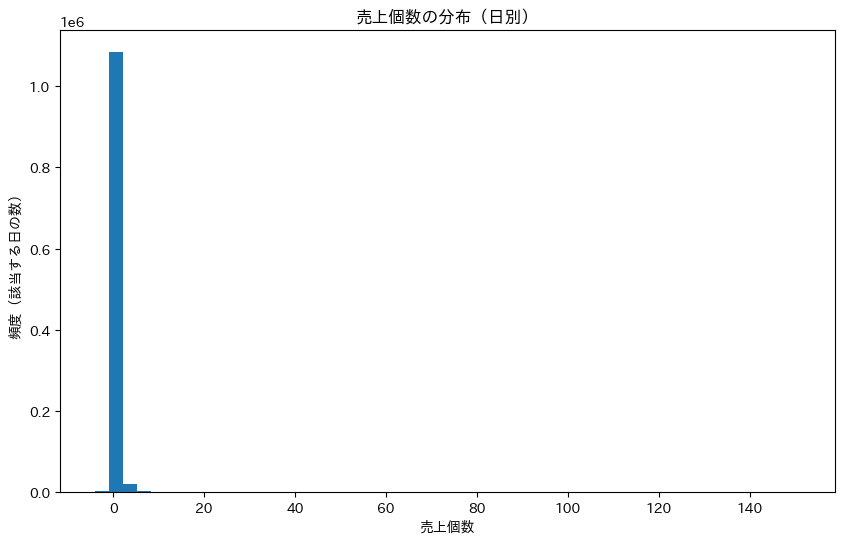

In [19]:
plt.figure(figsize=(10, 6)) # グラフのサイズを指定
plt.hist(sales_df['売上個数'], bins=50) # binsで棒の数を調整
plt.title('売上個数の分布（日別）')
plt.xlabel('売上個数')
plt.ylabel('頻度（該当する日の数）')
plt.show()

日別の売上個数はほとんどが少量だが、極端に大きいものがまれにあるようです。
偏りが大きすぎて見にくいので、売上個数が10個以下のデータに絞って表示してみます。

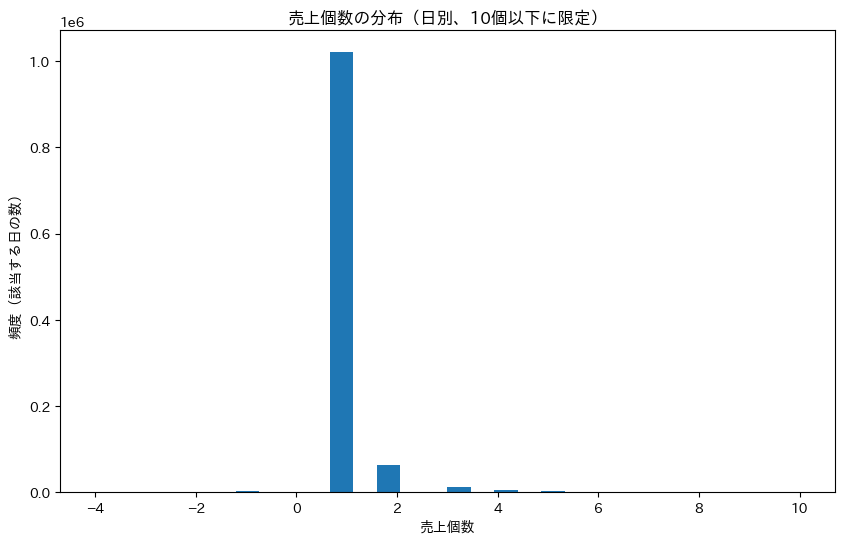

In [20]:
# 売上個数が10以下のデータに絞って表示
plt.figure(figsize=(10, 6))
plt.hist(sales_df[sales_df['売上個数'] <= 10]['売上個数'], bins=30)
plt.title('売上個数の分布（日別、10個以下に限定）')
plt.xlabel('売上個数')
plt.ylabel('頻度（該当する日の数）')
plt.show()

どうやら、1日に1個売れるというケースがほとんどのようです。

* ヒストグラムを見ることで、売上個数 の多くがどの範囲に集まっているか、また極端に大きな売上個数（外れ値の可能性）やマイナスの売上個数（返品など）がどの程度あるかを視覚的に把握できます。

* もしグラフの大部分が特定の値（例えば1個）に集中し、他の部分が見えにくい場合は、bins の数を調整したり、表示する値の範囲を絞ったりすることで、より詳細な分布を確認できます。

### 2-4-4. 店舗別・商品別の売上傾向の確認（棒グラフ）
次に、どの店舗の売上が高いのか、またどの商品が多く売れているのか、といった傾向を棒グラフで見てみましょう。

**店舗ID別の総売上個数**

In [21]:
# 店舗ID別に売上個数を合計
sales_by_store = sales_df.groupby('店舗ID')['売上個数'].sum().reset_index()

# 売上個数の多い順にソート
sorted_sales_by_store = sales_by_store.sort_values('売上個数', ascending=False) # 売上個数の多い順に並び替え
sorted_sales_by_store['店舗ID'] = sorted_sales_by_store['店舗ID'].astype(str) # 店舗IDを文字列型に変換（グラフ描画用）
sorted_sales_by_store

,店舗ID,売上個数
13,13,124804.0
7,7,123934.0
0,0,106271.0
6,6,101464.0
10,10,101367.0
3,3,87332.0
9,9,66349.0
4,4,64866.0
17,17,55862.0
2,2,55686.0


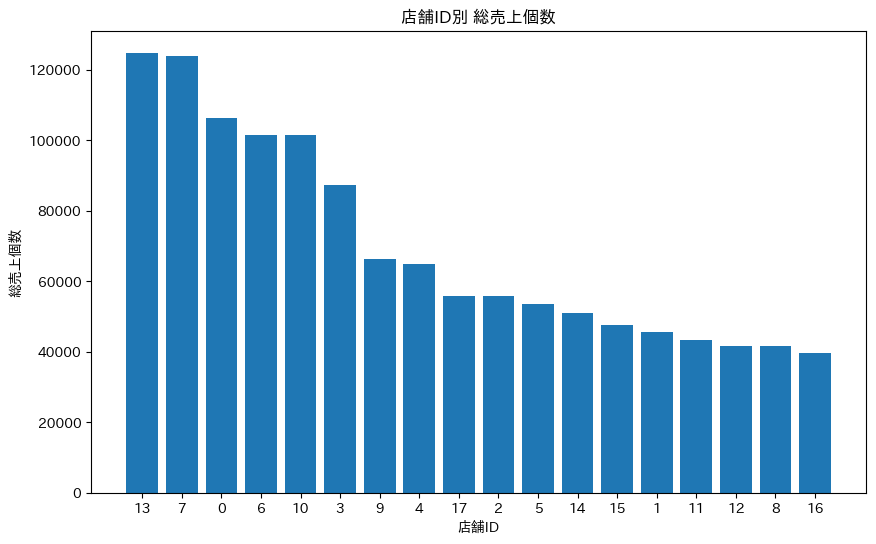

In [22]:
# 棒グラフで可視化
plt.figure(figsize=(10, 6))
plt.bar(sorted_sales_by_store['店舗ID'], sorted_sales_by_store['売上個数'])
plt.title('店舗ID別 総売上個数')
plt.xlabel('店舗ID')
plt.ylabel('総売上個数')
plt.show()

店舗によって売上個数に差があることが分かりました。ここから、「店ごとに商品の売れ方が違うかもしれない」「予測のための変数（説明変数、特徴量）として店舗IDは効果的かもしれない」といった予想ができます。

このように、探索的データ分析はデータを見て「今回のデータはどのような傾向を持っているのか？」「どのデータが予測に効果がありそうか？」を考えていく工程です。

**商品ID別の総売上個数（上位20商品）**  
商品IDの種類が非常に多いため、ここでは売上個数の合計が多い上位20件に絞って表示します。

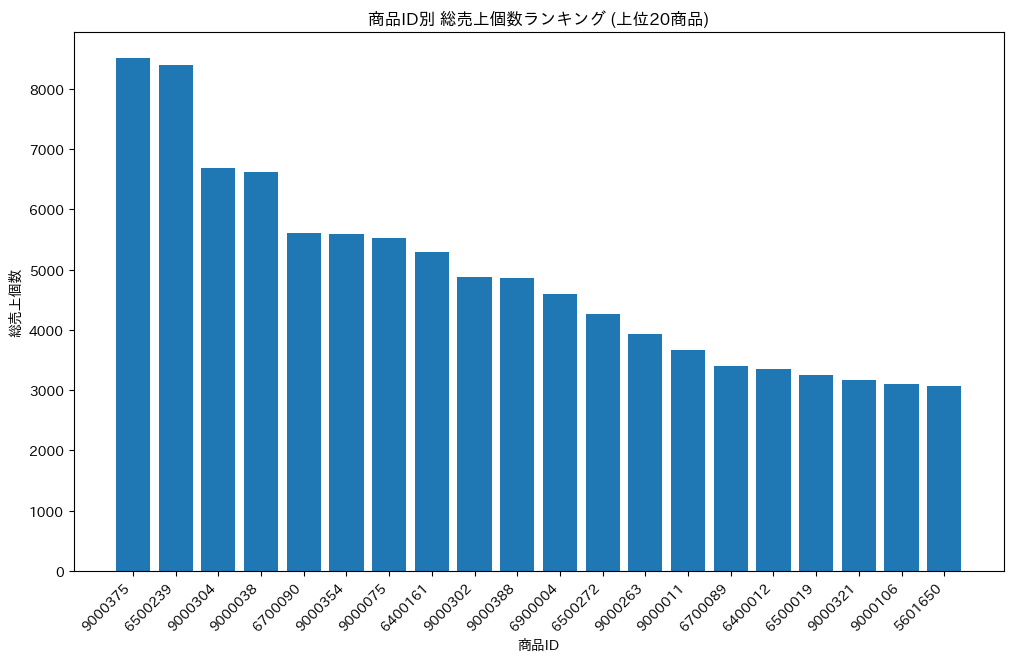

In [23]:
# 商品ID別に売上個数を合計
sales_by_item = sales_df.groupby('商品ID')['売上個数'].sum().reset_index()

# 売上個数の多い順にソートし、上位20件を抽出
top20_items = sales_by_item.sort_values('売上個数', ascending=False).head(20)
top20_items['商品ID'] = top20_items['商品ID'].astype(str) # 商品IDを文字列型に変換（グラフ描画用）

# 棒グラフで可視化
plt.figure(figsize=(12, 7))
plt.bar(top20_items['商品ID'], top20_items['売上個数'])
plt.title('商品ID別 総売上個数ランキング (上位20商品)')
plt.xlabel('商品ID')
plt.ylabel('総売上個数')
plt.xticks(rotation=45, ha='right') # 商品IDが見やすいようにX軸ラベルを回転
plt.show()

このグラフから、特に売れ筋の商品IDを特定することができます。これらのIDがどのような商品なのかを `item_categories_df` や `category_names_df` と照らし合わせてみるのも良いでしょう。

このグラフから、売上貢献度の高い店舗や、逆に売上が低い店舗の傾向を把握できます。

これらの簡単なEDAだけでも、データに対する理解が深まり、後の前処理やモデル構築の方針を立てる上で重要な示唆が得られることがあります。

これで、今回使用するデータの読み込みと、探索的なデータ分析の初歩が完了しました。次の第3章では、これらのデータをAIモデルが学習しやすいように加工する「前処理」を行っていきます

<a name="3"></a>
# 第3章：データの前処理

第2章では、分析に使用するデータを読み込み、その基本的な内容を確認しました。しかし、読み込んだままのデータが、AIモデルの学習に常に最適であるとは限りません。多くの場合、モデルが学習しやすいように、また分析の目的に合わせてデータを加工・整形する「前処理」という工程が必要になります。

この章では、以下の主な前処理ステップを行います。

1.  **売上集計単位の変更**:
  * 当課題の目的は「月単位」の売上個数を予測することですが、salesデータにおける売上個数は、冒頭で確認したとおり「日単位」で記録されています。
  * そこで、両者の単位を揃えるために、日別の売上データを「月単位」で集計するという処理を事前に行います。
2.  **データの統合**:
  * 当課題の配布データは、情報が複数のファイルに分かれています。
  * モデルによる学習・推論を行うには、必要な情報を一つの表に集約しておく必要があるので、予測に役立ちそうなデータに関しては、データの統合処理を行います。
3.  **データ型の変換**:
  * モデルに入力するデータは数値型のデータである必要があります。
  * 予測に使用するデータの型を全て数値型に変更します。
4.  **学習データとテストデータの構造統一**:
  * モデルによる学習・推論を正しく行うには、テスト用データの構造を学習用データの構造と統一する必要があリます。
  * 予測対象であるテストデータの列構成やデータ型を学習用データに揃えます。これはモデルを正しく適用するために不可欠です。

それでは、具体的な処理を見ていきましょう。

## 3-1. 売上集計単位の変更（日別 → 月別）

`sales_df` には日別の売上個数が記録されていますが、今回の予測目標は「2022年12月の月間売上個数」です。当課題では「月単位」の売上を予測することが目的のため、過去の売上データに関しても「月単位」で情報を集約する必要があります。そのため、まずは日別の売上データを月別に集計します。

**前処理方針**

* `sales_df` の `日付` 列から「年」と「月」の情報を抽出します。
* 「商品ID」「店舗ID」「年」「月」の組み合わせごとに「売上個数」を合計します。
* 集計結果を新しいデータフレーム `sales_month_df` として作成します。

**「年」と「月」の情報を抽出**
* まず「日付」カラムから年・月の情報を抽出することで、「月単位」の売上個数の集計を行うための準備を行います。
* なお、「日付」カラムには '2021-01-01' のように 『年月日が ハイフン'-'で区切られている』という規則性があるため、この規則性を利用して、年・月情報を抽出した新しいカラムを生成することにします。
* ここでは、pandasライブラリの`apply()`関数と、文字列型データに対して適用できる`split()`という2つの関数を使用して、上記の処理を実現します。

※ 参考教材へのリンク... [apply()関数の使い方](https://biz.quest.signate.jp/quests/10010/contents/8/5/1), [split()関数の使い方](https://biz.quest.signate.jp/quests/10003/contents/1/4/2)

In [24]:
# 「日付」カラムの文字列から、「年」「月」の情報を抽出する
sales_df['年'] = sales_df['日付'].apply(lambda x: x.split('-')[0])
sales_df['月'] = sales_df['日付'].apply(lambda x: x.split('-')[1])

sales_df.head()

,日付,店舗ID,商品ID,商品価格,売上個数,年,月
0,2021-01-01,10,5600001,420,2.0,2021,01
1,2021-01-01,7,5600003,250,1.0,2021,01
2,2021-01-01,9,5600005,250,1.0,2021,01
3,2021-01-01,14,5600005,250,1.0,2021,01
4,2021-01-01,0,5600005,250,1.0,2021,01


**月ごとに売上個数を集計**  
* 続いて、上で作成した2つのカラム「年」「月」を利用して、「月単位」の売上個数を集計します。
* 使用する関数は、pandasライブラリの`groupby()`です。<br>
(予測の対象は、「商品×店舗」ごとの売上個数なので、商品IDと店舗IDの値も`groupby()`の引数に含めます。

※ 参考教材へのリンク... [groupby()の使い方](https://biz.quest.signate.jp/quests/10007/contents/5/3/1)

In [25]:
# 商品ID、店舗ID、年、月 ごとに売上個数を合計して月間売上個数を算出
sales_month_df = sales_df.groupby(['商品ID', '店舗ID', '年', '月'])['売上個数'].sum().reset_index()
sales_month_df.head()

,商品ID,店舗ID,年,月,売上個数
0,5000001,0,2021,02,1.0
1,5000001,0,2021,04,1.0
2,5000001,0,2021,07,1.0
3,5000001,0,2021,08,1.0
4,5000001,0,2021,09,1.0


* `.groupby()`: 指定した列の組み合わせでデータをグループ化します。

* `.sum()`: グループごとに数値を合計します。

* `.reset_index()`: グループ化によってインデックスになった列を通常の列に戻します。

In [26]:
# 月別に集計された売上データ (sales_month_df) の情報
sales_month_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493051 entries, 0 to 493050
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   商品ID    493051 non-null  int64  
 1   店舗ID    493051 non-null  int64  
 2   年       493051 non-null  object 
 3   月       493051 non-null  object 
 4   売上個数    493051 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 18.8+ MB


* 新しく生成した`年`と`月`の列はobject型（文字列型）であることを覚えておいてください。

## 3-2. データの統合
続いて、複数ファイルにバラバラになっている情報を一つの表に集約する処理を行います。
配布データには、「商品カテゴリ」に関する情報が含まれていますが、その所在はitem_categories.csvというファイルにあり、売上データであるsales_histries.csvとは別の表です。<br>
そこで、月別売上データ (`sales_month_df`) に、商品のカテゴリ情報 (`item_categories_df`) を統合します。これにより、どの商品がどのカテゴリに属するかの情報が売上データと紐付きます。<br>
売上データ(sales_month_df)と商品カテゴリデータ(item_categories_df)には、共通データとして「商品ID」カラムを持っているため、このカラムが同じIDに該当する行どうしを紐付けることで2つの表を統合することができます。
`pandas` の `merge` 関数を使い、共通のキー（ここでは `商品ID`）を基に2つのデータフレームを結合します。<br>

※ 参考教材へのリンク... [merge()関数の使い方](https://biz.quest.signate.jp/quests/10007/contents/4/4/1)



In [27]:
# 月別売上データ (sales_month_df) と 商品カテゴリ対応表 (item_categories_df) を '商品ID' をキーに結合
# これにより、学習に必要な特徴量を含む学習用データフレームの元を作成
train_df = pd.merge(sales_month_df, item_categories_df, on='商品ID', how='left')
train_df.head()

,商品ID,店舗ID,年,月,売上個数,商品カテゴリID
0,5000001,0,2021,02,1.0,500
1,5000001,0,2021,04,1.0,500
2,5000001,0,2021,07,1.0,500
3,5000001,0,2021,08,1.0,500
4,5000001,0,2021,09,1.0,500


In [28]:
# 商品カテゴリ情報を統合したデータ (train_df) の情報
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493051 entries, 0 to 493050
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   商品ID      493051 non-null  int64  
 1   店舗ID      493051 non-null  int64  
 2   年         493051 non-null  object 
 3   月         493051 non-null  object 
 4   売上個数      493051 non-null  float64
 5   商品カテゴリID  493051 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 22.6+ MB


* `pd.merge(df1, df2, on='キー列名', how='結合方法')`: 2つのDataFrameを結合します。

  * `on='商品ID'`: 商品ID 列の値が一致する行同士を結合します。

  * `how='left'`: `sales_month_df` (左側のDataFrame) の行はすべて保持し、対応する `item_categories_df` の情報を付加します。もし `item_categories_df` に対応する 商品ID がなければ、その部分は欠損値 (NaN) になります。<br>

「商品ID」「商品カテゴリID」に基づき表データを1つに統合することで、売上レコードに対してより豊富な情報を付与することができました。<br>
結合前の`sales_month_df`の行数と、結合後の`train_df`の行数を`.info()`で比較すると、同じ行数であることが確認できます。このことから`sales_month_df`のデータはすべて保持されたことが分かります。



## 3-3. データ型の変換（数値化）
AIモデル、特に線形回帰のようなモデルは、数値データを入力として受け取ることが一般的です。`train_df` のデータ型を確認するために、上の`train_df.info()`の実行結果を見てみると、`年`と`月`が`object`型(文字列型)になっていることが分かります。

これは`年`と`月`がもともとは文字列型の`日付`カラムから生成されたためです。これらを整数型`int`に修正します。

データ型の変更処理には、`pandas`ライブラリの`astype()`関数を使用します。

In [29]:
train_df['年'] = train_df['年'].astype(int)
train_df['月'] = train_df['月'].astype(int)

# 確認
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493051 entries, 0 to 493050
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   商品ID      493051 non-null  int64  
 1   店舗ID      493051 non-null  int64  
 2   年         493051 non-null  int64  
 3   月         493051 non-null  int64  
 4   売上個数      493051 non-null  float64
 5   商品カテゴリID  493051 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 22.6 MB


* `.astype(int)`: 指定した列のデータ型を整数型に変換します。

無事、全てのデータを数値型(整数`int`もしくは浮動小数点数`float`)に統一することができました。

## 3-4. 学習用データとテスト用データの構造統一
AIモデルを学習させる際には、学習用データと、予測を行いたいテスト用データの「形」を揃える必要があります。具体的には、モデルに入力する特徴量（説明変数）の列構成やデータ型が一致している必要があります。

まずは、改めて学習用データ(train_df)とテスト用データ(test_df)を表示することで、両者の違いを確認しましょう。

In [30]:
# 学習用データの表示
train_df

,商品ID,店舗ID,年,月,売上個数,商品カテゴリID
0,5000001,0,2021,2,1.0,500
1,5000001,0,2021,4,1.0,500
2,5000001,0,2021,7,1.0,500
3,5000001,0,2021,8,1.0,500
4,5000001,0,2021,9,1.0,500
...,...,...,...,...,...,...
493046,9000450,13,2022,10,1.0,900
493047,9000450,14,2022,10,1.0,900
493048,9000451,9,2022,9,110.0,900
493049,9000451,9,2022,10,129.0,900


In [31]:
# テスト用データの表示
test_df

,index,商品ID,店舗ID
0,0,5000010,0
1,1,5000010,1
2,2,5000010,2
3,3,5000010,3
4,4,5000010,4
...,...,...,...
3055,3055,9000104,13
3056,3056,9000104,14
3057,3057,9000104,15
3058,3058,9000104,16


学習用のデータと比べると、「商品ID」と「店舗ID」が共通して存在する一方で、余分なカラムが「index」、足りないカラムが「年」「月」「売上個数」「商品カテゴリID」の4つあることがわかります。 そこで、これらのテスト用データに不足するカラムに関する対応の方針を考えましょう。

* 「年」... 今回売上を予測したい期間は、『2022年の12月』なので、**一律で2022となるカラムを作成**することで学習用データと条件を揃えることができます。
* 「月」... 「年」カラムと同様の理由で、**一律で12**とします。
* 「商品カテゴリID」... 学習用データと同様に、共通カラム「商品ID」に基づき **商品カテゴリデータと統合**しましょう。
* 「売上個数」... これは、『予測をしたい値』であり、モデルに入力する値には含まれないため、**新たにカラムを作成する必要はありません**。

「index」カラムはモデルの学習には不要なので、この後の特徴量選択時に使わないようにします。

`test_df` は、予測対象である2022年12月の「店舗ID」と「商品ID」の組み合わせリストです。これに、学習用データ (`train_df`) と同様の「年」「月」「商品カテゴリID」の情報を付加していきます。

1. `test_df` に「年」列 (2022) と「月」列 (12) を追加します。

2. `test_df` に `item_categories_df` をマージして「商品カテゴリID」を追加します。

In [32]:
# test_df に '年' と '月' の列を追加 (予測対象は2022年12月)
test_df['年'] = 2022
test_df['月'] = 12

In [33]:
# test_df に商品カテゴリIDを付与
# (item_categories_df は2-1で読み込み済み)
test_df = pd.merge(test_df, item_categories_df, on='商品ID', how='left')
test_df

,index,商品ID,店舗ID,年,月,商品カテゴリID
0,0,5000010,0,2022,12,500
1,1,5000010,1,2022,12,500
2,2,5000010,2,2022,12,500
3,3,5000010,3,2022,12,500
4,4,5000010,4,2022,12,500
...,...,...,...,...,...,...
3055,3055,9000104,13,2022,12,900
3056,3056,9000104,14,2022,12,900
3057,3057,9000104,15,2022,12,900
3058,3058,9000104,16,2022,12,900


In [34]:
# 必要な列を追加した test_df の情報
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   index     3060 non-null   int64
 1   商品ID      3060 non-null   int64
 2   店舗ID      3060 non-null   int64
 3   年         3060 non-null   int64
 4   月         3060 non-null   int64
 5   商品カテゴリID  3060 non-null   int64
dtypes: int64(6)
memory usage: 143.6 KB


今回は'店舗ID', '商品ID', '年', '月', '商品カテゴリID' の5列を特徴量として使用することにします。  
モデルに入力するデータを最終的に「説明変数（特徴量）」と「目的変数」だけに絞り込むために、ここで使用するカラムを定義しておきます。

In [35]:
# 学習データとテストデータで使用する特徴量の列を定義
# 今回は '店舗ID', '商品ID', '年', '月', '商品カテゴリID' を特徴量として使用
# 目的変数は '月間売上個数' (train_dfのみに存在)
feature_columns = ['店舗ID', '商品ID', '年', '月', '商品カテゴリID']
target_column = '売上個数'

これで、学習用データ (`train_df`) とテスト用データ (`test_df`) の前処理が完了し、モデル構築に進む準備が整いました。
`train_df` には予測の手がかりとなる特徴量と、予測対象である 月間売上個数 が含まれています。
`test_df` には、同様の特徴量と、提出時に使用する `ID` が含まれています。

次の第4章では、これらのデータを使って実際にAIモデルを構築し、学習・予測を行います。

<a name="4"></a>
# 第4章：予測モデルの構築と学習

第3章では、AIモデルが学習しやすいようにデータを整える「前処理」を行いました。これで、モデル構築のための準備が整いました。
この章では、いよいよAIモデルを構築し、前処理済みのデータを使って学習させ、未来の売上個数を予測するステップに進みます。

今回使用するモデルは「線形回帰 (Linear Regression)」モデルです。これは、入力される特徴量（説明変数）と予測したい値（目的変数）の間に直線的な関係があると仮定して予測を行う、シンプルかつ基本的な機械学習アルゴリズムの一つです。

主なステップは以下の通りです。

1.  **説明変数と目的変数の準備**: 学習用データから、予測の手がかりとなる「説明変数（X）」と、予測したい「目的変数（y）」を分けます。テスト用データからも同様に説明変数を準備します。
2.  **モデルの選択と初期化**: `scikit-learn` ライブラリから `LinearRegression` モデルを呼び出し、使える状態にします。
3.  **モデルの学習**: 学習用の説明変数と目的変数を使って、モデルにデータ内のパターンを学習させます。
4.  **モデルによる予測**: 学習済みのモデルを使って、テスト用データの説明変数から目的変数を予測します。

## 4-1. 説明変数と目的変数の準備

まず、学習用データ (`train_df`) から、モデルに入力する特徴量（説明変数 `X_train`）と、予測対象である売上個数（目的変数 `y_train`）を分けます。
同様に、予測を行いたいテスト用データ (`test_df`) からも、同じ特徴量のセット（説明変数 `X_test`）を準備します。

第3章の最後で定義した `feature_columns`（特徴量として使う列名のリスト）と `target_column`（目的変数の列名）を使用します。


In [36]:
# 第3章で定義した特徴量の列名リストと目的変数の列名
# feature_columns = ['店舗ID', '商品ID', '年', '月', '商品カテゴリID']
# target_column = '売上個数'

# 学習用データから説明変数 (X_train) と目的変数 (y_train) を作成
X_train = train_df[feature_columns]
y_train = train_df[target_column]

# テスト用データから説明変数 (X_test) を作成
# (test_df には目的変数 target_column は含まれていない)
X_test = test_df[feature_columns]

# 念のため、各データフレームの形状（行数、列数）を確認
print("X_train の形状:", X_train.shape)
print("y_train の形状:", y_train.shape)
print("X_test の形状:", X_test.shape)

X_train の形状: (493051, 5)
y_train の形状: (493051,)
X_test の形状: (3060, 5)


In [37]:
# X_train の先頭5行
X_train.head()

,店舗ID,商品ID,年,月,商品カテゴリID
0,0,5000001,2021,2,500
1,0,5000001,2021,4,500
2,0,5000001,2021,7,500
3,0,5000001,2021,8,500
4,0,5000001,2021,9,500


In [38]:
# y_train の先頭5行
y_train.head()

,売上個数
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [39]:
# X_test の先頭5行
X_test.head()

,店舗ID,商品ID,年,月,商品カテゴリID
0,0,5000010,2022,12,500
1,1,5000010,2022,12,500
2,2,5000010,2022,12,500
3,3,5000010,2022,12,500
4,4,5000010,2022,12,500


* `X_train` は、`train_df` から `feature_columns` で指定された列のみを抽出したものです。

* `y_train` は、`train_df` の `target_column`（売上個数）列です。

* `X_test` は、`test_df` から `feature_columns` で指定された列のみを抽出したものです。

**注意点：欠損値の確認と対処**  
この段階で、`X_train` や `X_test` に欠損値 (NaN) が含まれていると、多くの機械学習モデルはエラーを起こすか、期待通りに学習できません。
本ノートブックではここまで欠損値はありませんでしたが、この後このコードをもとにご自身で改良を加えていった際には欠損値が含まれる可能性があります。ここで改めて確認し、もし残っていれば適切な方法（例：平均値や中央値で埋める、0で埋める、行ごと削除する等）で処理する必要があります。

In [40]:
# X_train と X_test の欠損値の確認
print("\nX_train の欠損値の数:")
print(X_train.isnull().sum())
print("\nX_test の欠損値の数:")
print(X_test.isnull().sum())

# もし欠損値がある場合の対処例 (ここでは0で埋める場合をコメントで示します)
# X_train = X_train.fillna(0)
# X_test = X_test.fillna(0)
# (実際の分析では、欠損値の性質を考慮してより適切な方法を選択してください)


X_train の欠損値の数:
店舗ID        0
商品ID        0
年           0
月           0
商品カテゴリID    0
dtype: int64

X_test の欠損値の数:
店舗ID        0
商品ID        0
年           0
月           0
商品カテゴリID    0
dtype: int64


もし上記で欠損が多数見つかる場合は、第3章の処理を見直してください。

## 4-2. モデルの選択と初期化
続いて、モデルの学習フェーズです。<br>
ここでは、**線形回帰モデル**というシンプルな予測モデルを使用します。<br>
線形回帰モデルには、`scikit-learn` ライブラリに含まれる `LinearRegression` モデルを使用します。
まず、このモデルを使えるように「インスタンス化」（初期化してモデルを使えるように型を生成）します。

※ 参考教材へのリンク... [scikit-learn道場](https://biz.quest.signate.jp/quests/10076)

In [41]:
# 線形回帰モデルの型の生成（インスタンス化）
model = LinearRegression()

# model 変数に LinearRegression オブジェクトが格納されたことを確認
model

LinearRegression()

* これで、model という名前で線形回帰モデルの機能（学習や予測など）を呼び出せるようになりました。

## 4-3. モデルの学習

次に、準備した学習用データ（`X_train` と `y_train`）を使って、モデルに学習させます。
モデルの `.fit()` メソッドに説明変数と目的変数を渡すことで、モデルはこれらのデータからパターンを学び、予測のための内部パラメータ（回帰係数など）を調整します。


In [42]:
# モデルの学習
# X_train (説明変数) と y_train (目的変数) を使ってモデルを訓練します
model.fit(X_train, y_train)

print("モデルの学習が完了しました。")

モデルの学習が完了しました。


* `.fit()` を実行すると、`model` オブジェクト（先ほど初期化した型）の内部状態が学習データに基づいて更新されます。
* 線形回帰の場合、学習データに対して最適な直線を引くように、各特徴量に対する重み（係数）と切片が計算されます。

## 4-4. 学習データに対する性能確認（参考）

モデルの学習が完了しました。ここで、学習に使ったデータ（`X_train`）に対して、モデルがどの程度うまく予測できるかを確認してみましょう。これは、いわば「モデルが一度見た問題（答えを知っている問題）をもう一度解かせてみる」ようなものです。

**なぜこれを行うのか？**  
モデルが学習データの内容をどれだけよく捉えられたか（適合度）の目安になります。ただし、これが良いからといって、未知のデータに対しても良い性能が出るとは限りません。

**評価指標：RMSE (Root Mean Squared Error - 二乗平均平方根誤差)**  
予測値と実際の値のズレの大きさを測る代表的な指標の一つです。値が小さいほど、予測のズレが小さい（精度が高い）ことを意味します。
計算式は、各データポイントでの「(実際の値 - 予測値)の二乗」を平均し、その平方根を取ったものです。

※ 参考教材へのリンク... [回帰問題における評価関数](https://biz.quest.signate.jp/quests/10057/contents/1/3)


In [43]:
# 学習データ (X_train) に対する予測値を算出
y_train_pred = model.predict(X_train)

In [44]:
# 予測結果 (y_train_pred) の一部を表示
print("予測結果 (y_train_pred) の先頭10件:")
print(y_train_pred[:10])

予測結果 (y_train_pred) の先頭10件:
[1.31202859 1.31934952 1.33033091 1.33399138 1.33765184 1.34497277
 1.34863323 0.99393985 0.99760031 1.00126078]


In [45]:
## 実際の値 (y_train) と予測値 (y_train_pred) を使ってRMSEを計算
# 1. mean_squared_error で平均二乗誤差を計算
mse_train = mean_squared_error(y_train, y_train_pred)
# 2. numpy の sqrt で平方根を取り、RMSEを算出
rmse_train = np.sqrt(mse_train)

print(f"学習データに対する予測のRMSE: {rmse_train:.4f}")

学習データに対する予測のRMSE: 4.8387


**この結果の解釈と注意点**

学習データに対するRMSEの値が得られました。この値は、モデルが学習データをどの程度再現できているかを示しています。

**【重要】この評価は「答えを知っている問題をもう一度解いた」ようなもの**  
ここで計算したRMSEは、あくまで**モデルが学習に使用したデータセットに対する性能**です。
例えるなら、教科書の問題を解答を見ながら練習し、「教科書の問題は全部解けるようになったぞ！」と言っているような状態です。

しかし、本当に知りたいのは、モデルが**まだ見たことのない新しいデータ（未知のデータ）**に対して、どれだけ正確に予測できるか（これを「汎化性能」と言います）です。
教科書の例で言えば、初めて見る応用問題や試験問題でどれだけ点数が取れるか、ということです。

学習データに対する性能が良いからといって、未知のデータに対する性能も良いとは限りません。モデルが学習データに過剰に適合しすぎて（これを「過学習」と言います）、新しいデータにはうまく対応できない場合があるからです。

In [46]:
# 参考：予測値と実際の値の一部を比較してみる
print("\n学習データに対する実際の値と予測値の比較 (先頭15件):")
comparison_df = pd.DataFrame({'実際の値 (y_train)': y_train.head(15), '予測値 (y_train_pred)': y_train_pred[:15]})
comparison_df


学習データに対する実際の値と予測値の比較 (先頭15件):


,実際の値 (y_train),予測値 (y_train_pred)
0,1.0,1.312029
1,1.0,1.319350
2,1.0,1.330331
3,1.0,1.333991
4,1.0,1.337652
5,1.0,1.344973
6,1.0,1.348633
7,1.0,0.993940
8,2.0,0.997600
9,1.0,1.001261


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


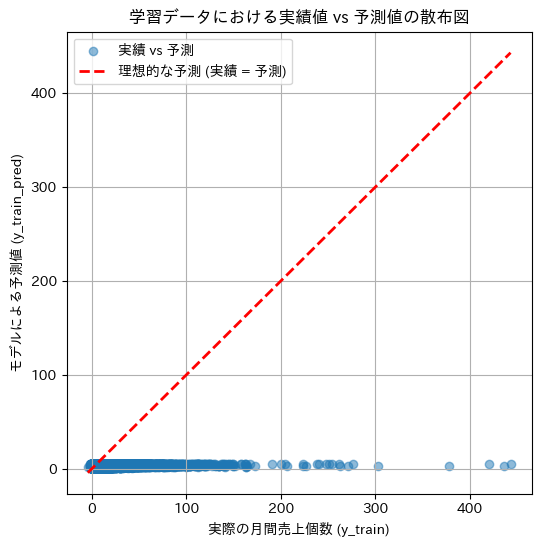

In [47]:
# 参考：予測値と実際の値を散布図で可視化
plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5, label='実績 vs 予測') # alphaで点の透明度を設定
# 理想的な予測を示す対角線 (y=x の線) を追加
min_val = min(y_train.min(), y_train_pred.min())
max_val = max(y_train.max(), y_train_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='理想的な予測 (実績 = 予測)') # 赤い破線
plt.xlabel("実際の月間売上個数 (y_train)")
plt.ylabel("モデルによる予測値 (y_train_pred)")
plt.title("学習データにおける実績値 vs 予測値の散布図")
plt.legend()
plt.grid(True)
plt.show()

**散布図から何がわかるか？**

上の散布図は、横軸に「実際の月間売上個数」、縦軸に「モデルが予測した月間売上個数」をプロットしたものです。一つ一つの点が、学習データ内の各商品・店舗・月の実績と予測のペアに対応します。

* **理想的な予測**:
  * もしモデルが完璧に予測できていれば、全ての点は赤い破線（実績値と予測値が等しい＝45度の線）上に乗ります。
  * 今回のモデルの予測結果は、赤い破線から大きく外れており、残念ながら性能はあまり高くなさそうです。
* **点のばらつき**:
  * 点がこの赤い破線からどれだけ離れているかが、個々の予測の誤差の大きさを視覚的に示しています。RMSEの値は、このばらつき具合を数値で要約したものと考えることができます。
* **傾向の確認**:
  * 点が全体的に赤い破線を中心に均等に分布していれば、モデルは特定の範囲で過大予測したり過小予測したりするような大きな偏りはないかもしれません。
  * もし、売上が大きい領域で点が破線より一貫して下に来る（過小予測の傾向）とか、逆に上に来る（過大予測の傾向）といったパターンが見られれば、モデルが特定の範囲のデータをうまく捉えられていない可能性を示唆します。
  * 今回のモデルは、一貫して赤い破線よりも下側に分布しているため、過小予測の傾向があることが分かります。

**より信頼性の高い性能評価のためには**  
通常、モデルの真の性能を評価するためには、学習に使用しなかった独立した「検証用データ（Validation Data）」や「テスト用データ（Test Data）」を用います。
このNotebookの後のステップでは、**test_df** という、まさに未知のデータセットに対する予測を行いますが、**test_df** には正解の売上個数が含まれていないため、直接RMSEを計算してモデルの性能を確かめることはできません。
（コンペでは、提出した予測結果が、運営側が持っている非公開の正解データと照らし合わされて評価され、そこでモデルの性能がある程度明らかになりますが、実務ではコンペと違い正解データはまだこの世の中にない（未来に入手できる）ので、どうやってモデルの性能を確かめるかは重要な問題です。）

そこで通常は開発プロセスにおいて、手元の学習データをさらに「学習用」と「検証用」に分割し、検証用データでモデルの性能を評価・調整していくことが一般的です（これを「ホールドアウト検証」や「交差検証」などと呼びます。第6章でも少し触れます）。


※ 参考教材へのリンク... [AI・機械学習のためのデータ設計入門](https://biz.quest.signate.jp/quests/10128)


ここでは、学習データに対するRMSEを一つの参考値として捉え、次のステップで未知のデータである X_test に対する予測に進みましょう。

## 4-5. モデルによる予測

学習が完了したモデルを使って、テストデータ (`X_test`) に対する予測を行います。
モデルの `.predict()` メソッドにテスト用の説明変数を渡すと、学習したパターンに基づいて、それぞれのデータポイントに対する目的変数の予測値を返します。


In [48]:
# 学習済みモデルを使って、テストデータ (X_test) に対する予測値を算出
y_pred = model.predict(X_test)

In [49]:
# 予測結果 (y_pred) の先頭10件
print(y_pred[:10])

[1.04107111 1.0292124  1.0173537  1.005495   0.9936363  0.9817776
 0.9699189  0.9580602  0.9462015  0.9343428 ]


In [50]:
# 予測結果の形状を確認
y_pred.shape

(3060,)

* `y_pred` は、`X_test` の各行に対応する予測された月間売上個数の配列です。
* 3060個の予測値があることが分かります。これは最初に確認したテストデータ(`test.csv`)、および提出用データ(`sample_submission.csv`)の行の数と同じです。
* 線形回帰モデルの特性上、予測値が負になることもありえます。売上個数はマイナスになることはあり得ないので、予測結果は0以上の値を取るべきです。そのような場合、予測結果が負になった場合の扱い（例：マイナスはすべて0に置き換える）を後処理として検討することもあります。

In [51]:
# y_predの中で0未満のものが何件あるか
print(f"y_predの中で0未満の数: {(y_pred < 0).sum()}件")

y_predの中で0未満の数: 0件


In [52]:
# (任意) 予測結果がマイナスになる場合の対処例：0に置き換える
# y_pred = np.maximum(0, y_pred)

これで、AIモデルの構築、学習、そして予測までの一連のプロセスが完了しました。  
`y_pred` に格納された予測結果を使って、次の第5章で提出用ファイルを作成します。

<a name="5"></a>
# 第5章：提出用ファイルの作成

第4章では、AIモデルを構築・学習させ、テストデータに対する予測値 (`y_pred`) を得ることができました。
この最終章では、この予測結果をコンペティションの指定する形式に合わせてCSVファイルとして出力し、提出できる状態にします。

主なステップは以下の通りです。

1.  **提出用サンプルファイルの確認**: `sample_submission.csv` を改めて確認し、提出すべきファイルの列構成やIDの対応を把握します。
2.  **予測結果の整形**: 予測値 `y_pred` を、提出用ファイルの形式に合わせて整形します。具体的には、`sample_submission.csv` の `target` 列を我々の予測値で置き換えます。
3.  **CSVファイルへの出力**: 整形したデータをCSVファイルとして保存します。

## 5-1. 提出用サンプルファイルの確認

まず、提出用ファイルのフォーマットを確認するために、`sample_submission.csv` の内容を再度見てみましょう。
このファイルには、提出に必要な `ID` 列と、予測値を格納すべき `target` 列が含まれています。

In [53]:
# 提出用サンプルファイル (submission_df) の先頭を確認
submission_df.head()

,0,1
0,0,100
1,1,100
2,2,100
3,3,100
4,4,100


* 最初に`pd.read_csv`で読み込んだ時に`header=None`としたため、列名がありません。

In [54]:
# 提出用サンプルファイル (submission_df) の情報
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3060 non-null   int64
 1   1       3060 non-null   int64
dtypes: int64(2)
memory usage: 47.9 KB


* 提出ファイルは、`0` 列と `1` 列の2列で構成されていることがわかります。
* `0` は `test_df` の `index` 列と対応しており、この `index` ごとに予測した売上個数を `1` 列（右側の列）に格納する必要があります。

## 5-2. 予測結果の整形と提出用データフレームの作成
第4章で得られた予測結果 `y_pred` は、`X_test` の各行（つまり `test_df` の各行）に対応する予測値の配列です。
この `y_pred` を、`submission_df` の `1` 列に代入します。

In [55]:
# y_pred は X_test の行順に対応しているため、
# test_df の ID と submission_df の ID の順序が同じであれば、そのまま代入可能

# 念のため、y_predの要素数とsubmission_dfの行数が一致するか確認
len(y_pred) == len(submission_df)

True

In [56]:
# submission_df の 1 列に予測結果 (y_pred) を代入
submission_df[1] = y_pred
submission_df

,0,1
0,0,1.041071
1,1,1.029212
2,2,1.017354
3,3,1.005495
4,4,0.993636
...,...,...
3055,3055,4.933639
3056,3056,4.921780
3057,3057,4.909922
3058,3058,4.898063


* これで、`submission_df` の `1` 列が、あなたのモデルによる予測値で更新されました。

## 5-3. 提出用CSVファイルの出力
最後に、予測結果が格納された `submission_df` をCSVファイルとして保存します。
`pandas` の `DataFrame` には `.to_csv()` というメソッドがあり、これを使うと簡単にCSVファイルに出力できます。

* `index=False`: DataFrameのインデックス（行番号）をCSVファイルに出力しないように指定します。コンペの指示でインデックスなしが求められているので提出ファイルには不要です。
* `header=False` :
DataFrameのヘッダー（列名）をCSVファイルに出力しないように指定します。コンペの指示でヘッダーなしが求められているので提出ファイルには不要です。

※参考教材へのリンク... [to_csv()関数の使い方](https://biz.quest.signate.jp/quests/10010/contents/2/4/1)

In [57]:
# 提出用ファイル名
submission_file_name = 'my_submission.csv' # ファイル名をここで変更

# 提出用データフレームをCSVファイルとして出力
# header=False とし、列名をファイルに含めない
# index=False とし、DataFrameのインデックスはファイルに含めない
submission_df.to_csv(base_dir + submission_file_name, index=False, header=False)

print(f"\n提出用ファイル '{submission_file_name}' が作成されました。")
print("このファイルをコンペティションサイトに提出してください。")


提出用ファイル 'my_submission.csv' が作成されました。
このファイルをコンペティションサイトに提出してください。


In [58]:
# (任意) 作成されたCSVファイルの中身を確認
check_submission_df = pd.read_csv(base_dir + submission_file_name, header=None)
check_submission_df
# 3060行あることを確認

,0,1
0,0,1.041071
1,1,1.029212
2,2,1.017354
3,3,1.005495
4,4,0.993636
...,...,...
3055,3055,4.933639
3056,3056,4.921780
3057,3057,4.909922
3058,3058,4.898063


これで、予測モデルの構築から予測結果のファイル出力まで、一連のプロセスが完了しました。
作成された `my_submission.csv` （または指定したファイル名のCSVファイル）を、SIGNATE Cloudに提出してください。

まだこれまでに一度も投稿経験がないという方は、今作ったファイルをそのまま一回目の投稿としてサイトに提出してみましょう。

ファイルはGoogleドライブのこのNotebookがあるフォルダに保存されているはずです。

次の第6章では、今回のモデルの精度をさらに改善するためのヒントやアイデアについて触れます。

<a name="6"></a>
# 第6章：精度改善に向けたヒント

ここまでの章で、データの読み込みから前処理、`LinearRegression`モデルの構築・学習、そして予測結果のファイル出力までの一連の流れを体験しました。
この章では、今回作成した予測モデルの精度をさらに高めるために試すことができる、いくつかのアイデアやアプローチについて解説します。

機械学習のプロジェクトでは、一度モデルを作って終わりではなく、様々な工夫を重ねて性能を改善していくことが一般的です。


## 6-1. 特徴量エンジニアリング (Feature Engineering)

予測モデルの精度に大きく影響するのが、「特徴量」の質と量です。特徴量エンジニアリングとは、元のデータからモデルの学習に役立つ新しい特徴量を作り出す作業のことです。

**特徴量追加の考え方**
* モデルが予測の手がかりとする情報を増やすことで、より高い予測精度を達成することが期待できます。
* 「ある月の売上に関連があるのはどんなデータなのか」を考え、予測の手がかりになりそうなデータを新たな説明変数として追加してみましょう。
* 例えば、クリスマスセールや年始の初売りなど、「この会社は毎年同じ時期に同じような販売施策を打つのかもしれない」という仮説を立てたとします。この仮説が正しい場合は、「1年前の同月、同商品の売上個数」という情報が、予測精度の向上に寄与するかもしれません。

**具体例**

* **時間に関連する特徴量の追加**:
    * **イベントフラグ**: 特定のイベントに連動して売上が増減する傾向があるかもしれません。（例: クリスマスやハロウィンなど）
    * **月の日数**: 28日しかない2月と31日ある月では10%ほど売上が変わってもおかしくないかもしれません。
    * **季節性**: 春夏秋冬や特定の月に関連する情報を数値化して加えます。（例: サイン・コサイン変換した月情報など）
* **過去の売上情報を活用 (ラグ特徴量)**:
    * **1ヶ月前の売上個数**: 直近の売上トレンドを捉えるために、1ヶ月前の同じ商品・店舗の売上個数を特徴量として加えます。
    * **過去数ヶ月の平均売上**: より安定した過去の傾向を捉えるために、過去3ヶ月や6ヶ月の平均売上個数を特徴量とします。
    * **1年前の同月の売上個数**: 年間の季節性を考慮するため、1年前の同じ月の売上個数を特徴量とします。
    * これらのラグ特徴量を作成する際は、`pandas` の `shift()` メソッドや `rolling()` メソッドが役立ちます。
* **商品や店舗に関する統計情報**:
    * **商品の平均価格**: 商品ごとの平均的な価格帯。
    * **店舗ごとの平均月間売上個数**: 店舗の規模や人気度を示す指標。
    * **商品カテゴリごとの平均月間売上個数**: カテゴリの人気度。
* **交互作用特徴量**:
    * 複数の特徴量を組み合わせることで、新しい意味を持つ特徴量を作成します。（例: 「店舗ID」と「商品カテゴリID」を組み合わせた特徴量など）
    * 単純な掛け算や、文字列として結合した後に数値化するなどの方法があります。

## 6-2. 異なるモデルの試行

今回は基本的な `LinearRegression` を使用しましたが、他にも様々な機械学習モデルが存在します。問題の性質やデータの特性によっては、他のモデルの方が高い精度を示すことがあります。

どのモデルが「良い」「悪い」ということはなく、データの性質とモデルの特性の組み合わせによって最適解は異なります。

* **決定木ベースのモデル**:
    * `DecisionTreeRegressor` (決定木): 非線形な関係も捉えやすいモデルですが、過学習しやすい傾向があります。
    * `RandomForestRegressor` (ランダムフォレスト): 複数の決定木を組み合わせて予測精度と汎化性能を高めたモデルです。
    * `GradientBoostingRegressor`, `XGBoost`, `LightGBM`: ランダムフォレストよりもさらに強力なアンサンブル学習モデルで、多くのコンペティションで高い性能を発揮します。
* **その他の回帰モデル**:
    * `Ridge`, `Lasso`: 線形回帰に正則化項を加えたもので、過学習を抑制する効果があります。
    * `SVR` (Support Vector Regressor): サポートベクターマシンを回帰に応用したモデル。
* モデルを変更する際は、`scikit-learn` のインターフェースが統一されているため、`model = LinearRegression()` の部分を新しいモデルのインスタンス化に置き換え、同様に `.fit()` と `.predict()` を行うだけで試すことができます（モデルによってはハイパーパラメータの調整が重要になります）。


## 6-3. ハイパーパラメータのチューニング

多くの機械学習モデルには、「ハイパーパラメータ」と呼ばれる、学習前に人間が設定する必要のあるパラメータがあります。これらの設定値によってモデルの性能が大きく変わることがあります。

* 例えば、`RandomForestRegressor` であれば、木の数 (`n_estimators`) や木の深さ (`max_depth`) などがハイパーパラメータにあたります。(`LinearRegression` は主要なハイパーパラメータが少ないモデルです。)
* `GridSearchCV` や `RandomizedSearchCV` (いずれも `scikit-learn` で提供) といったツールを使うと、複数のハイパーパラメータの組み合わせを効率的に試し、最適な設定を見つけることができます。


## 6-4. データのさらなる前処理・クレンジング

* **外れ値の処理**: 極端に大きな値や小さな値（外れ値）がモデルの学習に悪影響を与えることがあります。外れ値を除去したり、別の値に置き換えたり（例: 丸め込む）することを検討します。
* **欠損値の高度な補完**: 単純に0で埋めるのではなく、他の特徴量との関係から予測して補完する、あるいは統計的な値（平均値、中央値、最頻値）で補完するなど、より洗練された方法を試します。
* **スケーリング**: 特徴量間の値のスケールが大きく異なると、一部のモデル（特に勾配法を用いるものや距離ベースのモデル）の学習がうまくいかないことがあります。`StandardScaler` や `MinMaxScaler` を使って特徴量のスケールを揃えることを検討します。(`LinearRegression` も恩恵を受けることがあります。)


## 6-5. モデル評価と改善サイクルの確立

* **モデル評価と改善の試行錯誤**: これまでの演習で、モデルの評価尺度を事前に決めたはずです（RMSE - Root Mean Squared Error）。その指標に基づいてモデルの性能を客観的に計測し、特徴量の追加やモデルの変更の効果を評価します。
* **交差検証 (Cross-Validation)**: 学習データをさらに複数のグループに分割し、一部を検証用データとして使いながらモデルの汎化性能を評価する手法です。これにより、特定のデータ分割に過度に依存しない、より信頼性の高い評価が得られます。`scikit-learn` の `KFold` や `cross_val_score` などが利用できます。

これらの改善策を一つずつ、あるいは組み合わせて試し、評価指標がどのように変化するかを確認しながら、試行錯誤を繰り返していくことが精度向上の鍵となります。

これらのヒントを参考に、ぜひさらなる精度向上に挑戦してみてください。データ分析とモデル構築は、探求と発見の連続であり、非常に奥深い分野です。

# 参考教材

SIGNATE Cloudでは、予測課題に関する様々なケーススタディ教材を提供しています。<br>
以下に、当課題に取り組む上で参考になるであろう教材をピックアップしました。<br>
どれもマナビDXQuestの受講期間中は無料で受講できる教材となっておりますので、余裕のある方はお取り組みください。

- [食品ロスの削減](https://biz.quest.signate.jp/quests/10002)
    - お弁当の廃棄ロスや売上機会の損失を避けるための手段として、未来のお弁当の売上を予測するモデルの作成に挑戦します。
- [自動車環境性能の改善](https://biz.quest.signate.jp/quests/10001)
    - 走行実験にかかる時間とコストの削減を目的として、自動車データを利用し燃費を予測するモデルの作成に挑戦します。
- [宿泊予約サービスにおける価格推定の適正化](https://biz.quest.signate.jp/quests/10011)
    - 宿泊予約サービスの売上最大化を目的として、価格の適正化に挑戦します。
- [スポーツのチケット価格の適正化](https://biz.quest.signate.jp/quests/10006)
    - 需給を把握した上で売上を最大化する価格設定を行うための手段として、観客数を予測するモデルの作成に挑戦します。
- [賃貸物件の家賃推定](https://biz.quest.signate.jp/quests/10060)
    - 不動産の適正価格を設定するための手段として、家賃推定モデルに挑戦します。